In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('TB_Burden_Country.csv')

In [2]:
data = data[[i for i in data.columns if 'bound' not in i]]

In [3]:
data.head()

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,Estimated prevalence of TB (all forms),Method to derive prevalence estimates,...,Estimated number of deaths from TB in people who are HIV-positive,Method to derive mortality estimates,Estimated incidence (all forms) per 100 000 population,Estimated number of incident cases (all forms),Method to derive incidence estimates,Estimated HIV in incident TB (percent),Estimated incidence of TB cases who are HIV-positive per 100 000 population,Estimated incidence of TB cases who are HIV-positive,Method to derive TBHIV estimates,"Case detection rate (all forms), percent"
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,306.0,36000.0,predicted,...,5.0,Indirect,189.0,22000.0,NaN,0.06,0.11,12.0,NaN,20.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,343.0,43000.0,predicted,...,8.0,Indirect,191.0,24000.0,NaN,0.07,0.13,17.0,NaN,96.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,371.0,51000.0,predicted,...,11.0,Indirect,191.0,26000.0,NaN,0.08,0.16,22.0,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,392.0,59000.0,predicted,...,17.0,Indirect,189.0,29000.0,NaN,0.10,0.19,28.0,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,410.0,68000.0,predicted,...,22.0,Indirect,188.0,31000.0,NaN,0.11,0.21,35.0,NaN,NaN


In [4]:
population_over_years = data.groupby(['Region', 'Year'])['Estimated total population number'].sum().reset_index()
tb_over_years = data.groupby(['Region', 'Year'])['Estimated prevalence of TB (all forms)'].sum().reset_index()

population_over_years.columns  = ['Region', 'Year', 'Population']
tb_over_years.columns = ['Region', 'Year', 'Estimated TB prevalence']

population = population_over_years.pivot(index='Year', columns='Region', values="Population")
tb = tb_over_years.pivot(index='Year', columns='Region', values="Estimated TB prevalence")

In [95]:
sns.set_theme(style="darkgrid")

In [18]:
set(data.loc[data['Region']=='SEA']['Country or territory name'].tolist())

{'Bangladesh',
 'Bhutan',
 "Democratic People's Republic of Korea",
 'India',
 'Indonesia',
 'Maldives',
 'Myanmar',
 'Nepal',
 'Sri Lanka',
 'Thailand',
 'Timor-Leste'}

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Estimated Population')]

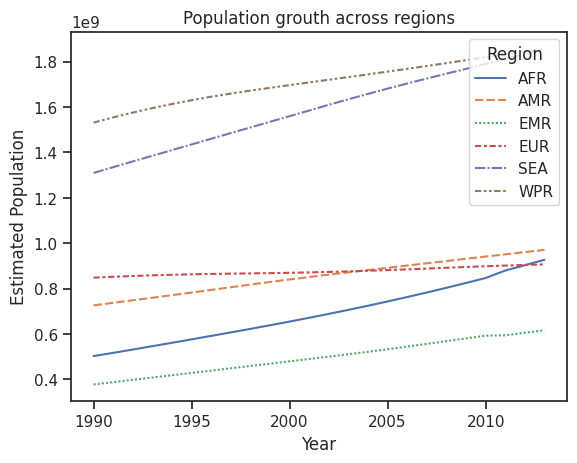

In [64]:
import matplotlib.pyplot as plt

plt.title('Population grouth across regions')
sns.lineplot(data=population).set(xlabel='Year', ylabel='Estimated Population')

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Estimated TB prevalence')]

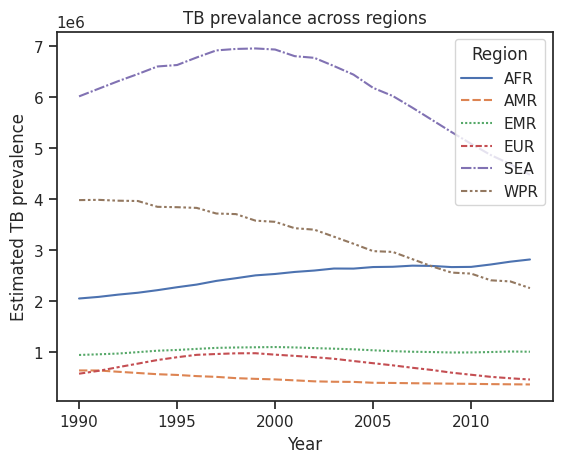

In [65]:
plt.title('TB prevalance across regions')
sns.lineplot(data=tb).set(xlabel='Year', ylabel='Estimated TB prevalence')

### looks the while the SEA region consisting of india and neighbouring countries, the population is continously increasing the estimated population but there is a drastic drop in the TB prevalence starting around 1999
### while the WPR region containin china, austrila and others the population growth is similar to SEA region, the TB prevalance is continously reducing since 1990 
### AFR is one region where the population growth and TB prevalance is continously increasing without any signs of reduction

In [109]:
data[data['ISO 3-character country/territory code']=='TLS']

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,Estimated prevalence of TB (all forms),Method to derive prevalence estimates,...,Estimated number of deaths from TB in people who are HIV-positive,Method to derive mortality estimates,Estimated incidence (all forms) per 100 000 population,Estimated number of incident cases (all forms),Method to derive incidence estimates,Estimated HIV in incident TB (percent),Estimated incidence of TB cases who are HIV-positive per 100 000 population,Estimated incidence of TB cases who are HIV-positive,Method to derive TBHIV estimates,"Case detection rate (all forms), percent"
4484,Timor-Leste,TL,TLS,626,SEA,2002,899367,809.0,7300.0,predicted,...,0.0,Indirect,498.0,4500.0,NaN,NaN,NaN,NaN,NaN,62.0
4485,Timor-Leste,TL,TLS,626,SEA,2003,933369,762.0,7100.0,predicted,...,0.0,Indirect,498.0,4700.0,NaN,NaN,NaN,NaN,NaN,69.0
4486,Timor-Leste,TL,TLS,626,SEA,2004,966987,741.0,7200.0,predicted,...,0.0,Indirect,498.0,4800.0,NaN,NaN,NaN,NaN,NaN,77.0
4487,Timor-Leste,TL,TLS,626,SEA,2005,995619,739.0,7400.0,predicted,...,0.0,Indirect,498.0,5000.0,NaN,NaN,NaN,NaN,NaN,76.0
4488,Timor-Leste,TL,TLS,626,SEA,2006,1018013,766.0,7800.0,predicted,...,0.0,Indirect,498.0,5100.0,NaN,NaN,NaN,NaN,NaN,71.0
4489,Timor-Leste,TL,TLS,626,SEA,2007,1035706,789.0,8200.0,predicted,...,0.0,Indirect,498.0,5200.0,NaN,NaN,NaN,NaN,NaN,63.0
4490,Timor-Leste,TL,TLS,626,SEA,2008,1050244,751.0,7900.0,predicted,...,0.0,Indirect,498.0,5200.0,NaN,NaN,NaN,NaN,NaN,63.0
4491,Timor-Leste,TL,TLS,626,SEA,2009,1064191,687.0,7300.0,predicted,...,0.0,Indirect,498.0,5300.0,NaN,NaN,NaN,NaN,NaN,90.0
4492,Timor-Leste,TL,TLS,626,SEA,2010,1079450,669.0,7200.0,predicted,...,0.0,Indirect,498.0,5400.0,NaN,NaN,NaN,NaN,NaN,NaN
4493,Timor-Leste,TL,TLS,626,SEA,2011,1096293,683.0,7500.0,predicted,...,0.0,Indirect,498.0,5500.0,NaN,NaN,NaN,NaN,NaN,80.0


In [39]:
sub_data = data[(data['Year']==2013) | (data['Year']==1990)][['ISO 3-character country/territory code', 'Year', 'Estimated total population number']]
top_ten_populus = sub_data[sub_data['Year'] == 2013].sort_values('Estimated total population number', ascending=False)['ISO 3-character country/territory code'].head(10).values
top_populus_contries = sub_data.loc[sub_data['ISO 3-character country/territory code'].isin(top_ten_populus)]

Text(0.5, 1.0, 'Top 10 Populus countries population growth')

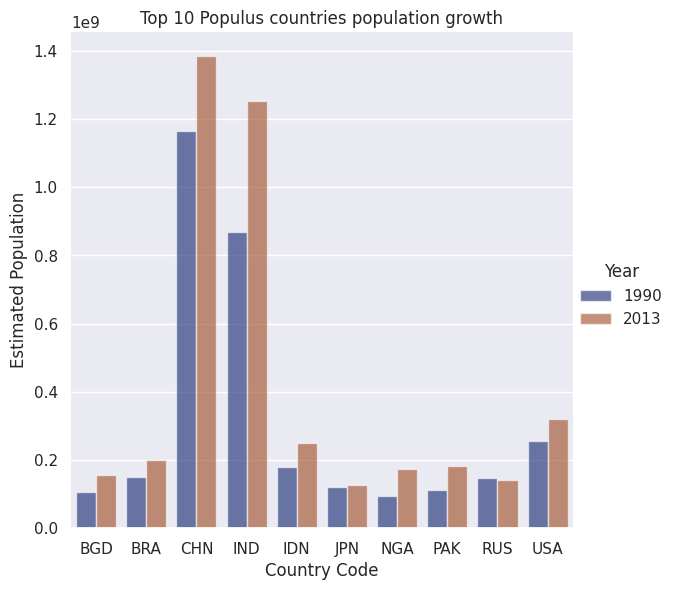

In [72]:
g = sns.catplot(
    data=top_populus_contries, kind="bar",
    x="ISO 3-character country/territory code", y="Estimated total population number", hue="Year",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Country Code", "Estimated Population")
g.legend.set_title("Year")
plt.title('Top 10 Populus countries population growth')

In [113]:
sub_data = data[((data['Year']==2013) | (data['Year']==1990)) & (data['Estimated total population number']>1000000)][['ISO 3-character country/territory code', 'Year', 'Estimated prevalence of TB (all forms) per 100 000 population', 'Estimated number of deaths from TB (all forms, excluding HIV)', 'Estimated number of deaths from TB in people who are HIV-positive']]
sub_data.columns = ['Country Code', 'Year', 'Estimated TB per 100 000', 'Estimated deaths by TB(wo HIV)', 'Estimated deaths by TB(w HIV)']
top_ten_effected_by_tb = sub_data[sub_data['Year'] == 2013].sort_values('Estimated TB per 100 000', ascending=False)['Country Code'].head(10).values
top_ten_effected_by_tb_contries = sub_data.loc[sub_data['Country Code'].isin(top_ten_effected_by_tb)]

Text(0.5, 1.0, 'Top 10 effected by TB with atleat 10 million population')

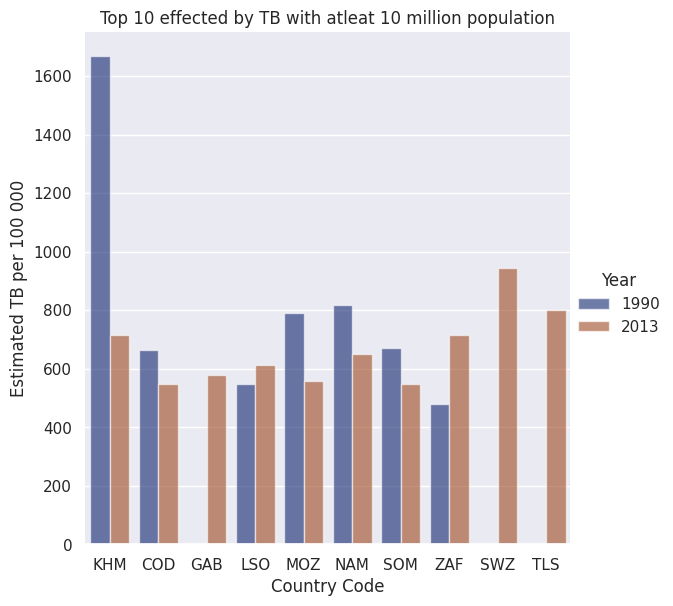

In [115]:
g = sns.catplot(
    data=top_ten_effected_by_tb_contries, kind="bar",
    x="Country Code", y="Estimated TB per 100 000", hue="Year",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Country Code", "Estimated TB per 100 000")
g.legend.set_title("Year")
plt.title('Top 10 effected by TB with atleat 10 million population')

In [116]:
sub_data = data[(data['Year']==2013) & (data['Estimated total population number']>1000000)][['ISO 3-character country/territory code', 'Estimated prevalence of TB (all forms) per 100 000 population', 'Estimated number of deaths from TB (all forms, excluding HIV)', 'Estimated number of deaths from TB in people who are HIV-positive']]
sub_data.columns = ['Country Code','Estimated TB per 100 000' , 'Deaths from TB(excluding HIV)', 'Deaths from TB with HIV']
sub_data['Total Deaths from TB'] = sub_data['Deaths from TB(excluding HIV)'] + sub_data['Deaths from TB with HIV'] 

Text(0.5, 1.0, 'Top 10 countries by Deaths with TB')

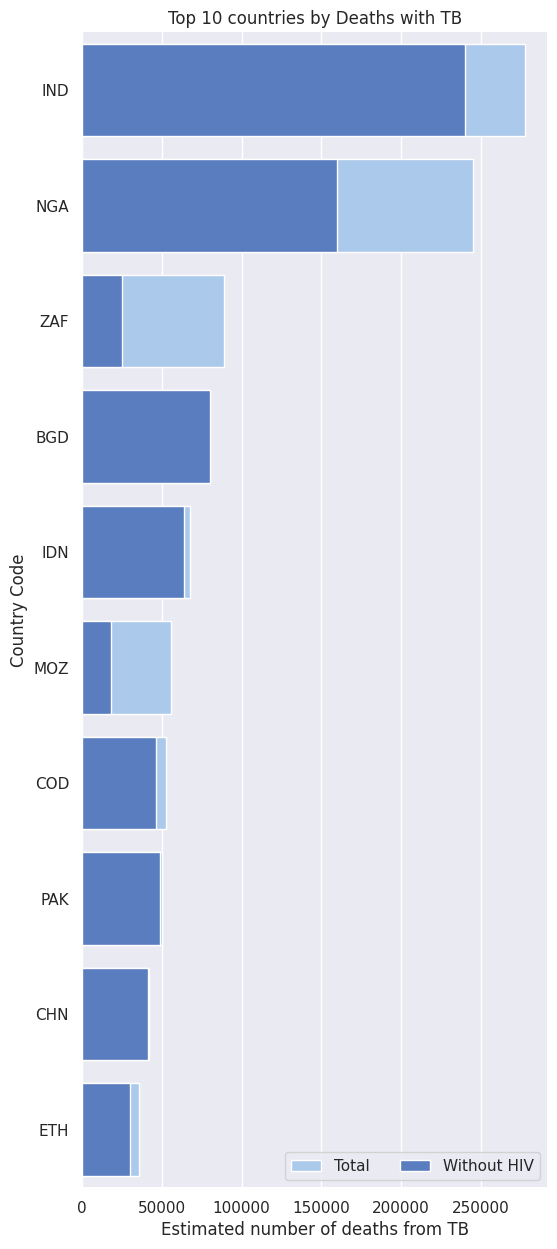

In [117]:
sub_data = sub_data.sort_values('Total Deaths from TB', ascending=False)
top_ten_by_deaths = sub_data['Country Code'].head(10).values
top_ten_countries_by_deaths = sub_data.loc[sub_data['Country Code'].isin(top_ten_by_deaths)]


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(x="Total Deaths from TB", y="Country Code", data=top_ten_countries_by_deaths, label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Deaths from TB(excluding HIV)", y="Country Code", data=top_ten_countries_by_deaths, label="Without HIV", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Country Code", xlabel="Estimated number of deaths from TB")
sns.despine(left=True, bottom=True)
plt.title('Top 10 countries by Deaths with TB')

Text(0.5, 1.0, 'Top 10 TB effected countries with atleast 10 million population')

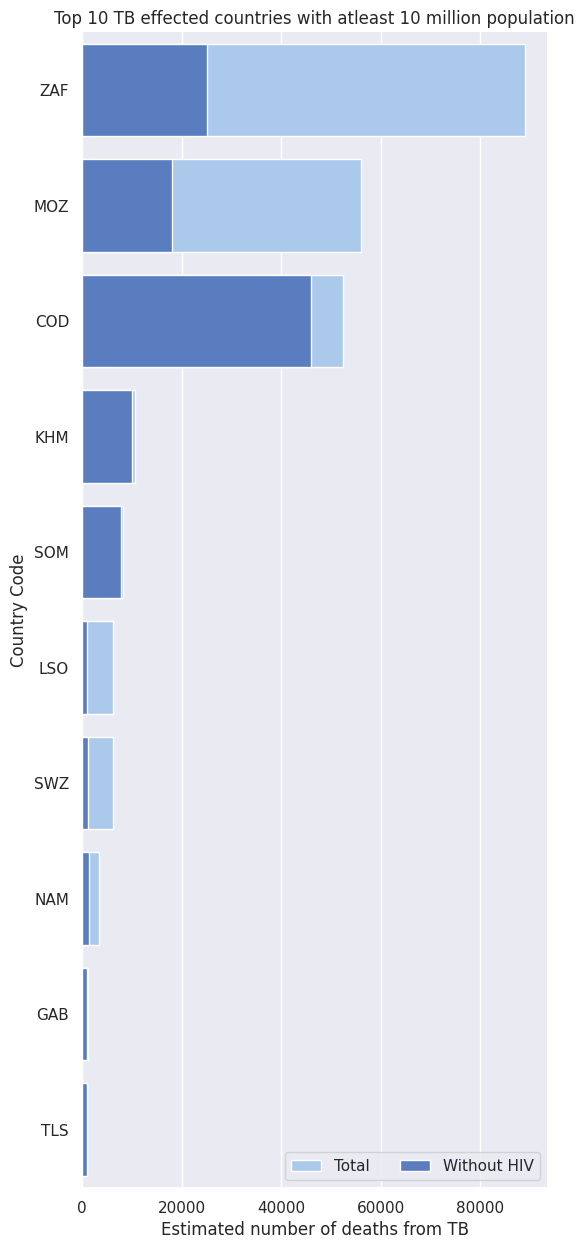

In [119]:
sub_data = sub_data.sort_values('Estimated TB per 100 000', ascending=False)
top_ten_effected_by_tb = sub_data['Country Code'].head(10).values
sub_data = sub_data.sort_values('Total Deaths from TB', ascending=False)
top_ten_tb_effected_countries = sub_data.loc[sub_data['Country Code'].isin(top_ten_effected_by_tb)]

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(x="Total Deaths from TB", y="Country Code", data=top_ten_tb_effected_countries, label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Deaths from TB(excluding HIV)", y="Country Code", data=top_ten_tb_effected_countries, label="Without HIV", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Country Code", xlabel="Estimated number of deaths from TB")
sns.despine(left=True, bottom=True)
plt.title('Top 10 TB effected countries with atleast 10 million population')

In [136]:
sub_data = data.loc[data['Year']==2013][['ISO 3-character country/territory code', 'Estimated total population number', 'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population']]
sub_data.columns = ['Country Code', 'Population', 'Mortality of TB cases']
sub_data_more_than_million = sub_data[sub_data['Population']>1000000]


In [145]:
top_10_by_mortality = sub_data_more_than_million.sort_values('Mortality of TB cases', ascending=False).head(10)

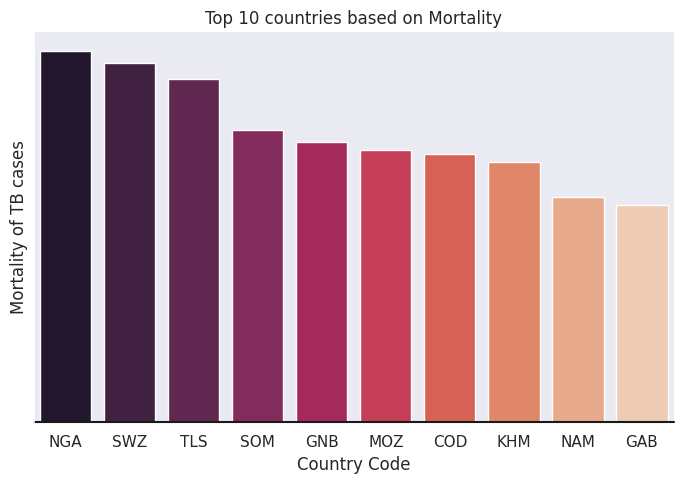

In [149]:
# Set up the matplotlib figure
f, ax1 = plt.subplots(1, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data

sns.barplot(x=top_10_by_mortality['Country Code'].tolist(), y=top_10_by_mortality['Mortality of TB cases'].tolist(), hue=top_10_by_mortality['Country Code'].tolist(), palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Mortality of TB cases")
ax1.set_xlabel("Country Code")
plt.title('Top 10 countries based on Mortality')
# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)